## Day Objective
- Multiple Linear Regression
- Polynomial Regression
- Split data set for training and testing

In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
df['Target'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [25]:
df.shape

(506, 14)

### Multiple Linear Regression
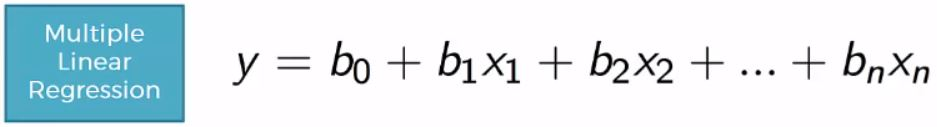

In [6]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


- +1 --> Positively related
- -1 --> Negitively related
- 0  --> No relation

- "RM" is positively corelated with "Target" column
- "LSTAT" is negitively corelated with "Target" column

In [7]:
X = df[['RM', 'LSTAT']]  ## Multiple independent variables
Y = df['Target']  ## dependent varibale

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lin_reg = LinearRegression()

In [10]:
lin_reg.fit(X, Y) # training

LinearRegression()

In [11]:
Y_predict = lin_reg.predict(X)
Y_predict

array([28.94101368, 25.48420566, 32.65907477, 32.40652   , 31.63040699,
       28.05452701, 21.28707846, 17.78559653,  8.10469338, 18.24650673,
       17.99496223, 20.73221309, 18.5534842 , 23.64474107, 23.10895823,
       22.9239452 , 24.65257604, 19.73611045, 18.9297215 , 20.57377596,
       13.51732408, 20.14832175, 17.90896697, 15.48764606, 18.35281036,
       16.56210901, 18.74440281, 18.34995811, 23.51018847, 24.94888935,
       13.23095259, 21.20092715, 11.15596625, 15.89983805, 16.63398622,
       22.65107562, 21.07107521, 22.81275431, 22.53014238, 29.46686594,
       33.15564849, 30.0244275 , 26.33937234, 25.50630935, 23.42747337,
       21.03183392, 19.03080004, 17.28696205,  6.35742724, 16.77652446,
       20.38222834, 23.73891662, 28.42223975, 23.78518476, 19.13293549,
       32.4841017 , 27.4553513 , 30.83048667, 25.54262118, 22.91599173,
       19.44389291, 19.76157796, 27.21060683, 26.99027936, 29.66411644,
       27.68813019, 21.54751591, 23.38578845, 18.73350058, 22.97

**Evaluation metrics for Regression models**

In [12]:
from sklearn.metrics import r2_score

In [13]:
r2_score(Y, Y_predict) ## Accuracy

0.6385616062603403

### Polynomial Regression Model

In [15]:
df2 = pd.read_csv('https://raw.githubusercontent.com/nagamounika5/Datasets/master/Position_Salaries.csv')
df2

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [16]:
X2 = df2[['Level']] # Independent variable
Y2 = df2['Salary'] # dependent variable

In [17]:
import matplotlib.pyplot as plt

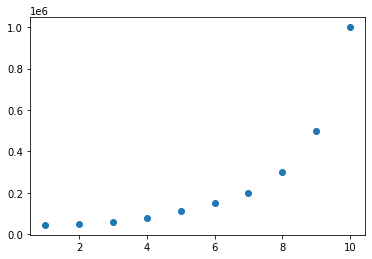

In [18]:
plt.scatter(X2, Y2)

- lets apply Linear Regression model

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lin_reg2 = LinearRegression()

In [21]:
lin_reg2.fit(X2, Y2) # training

LinearRegression()

In [22]:
Y_predict2 = lin_reg2.predict(X2)

In [23]:
Y_predict2

array([-114454.54545455,  -33575.75757576,   47303.03030303,
        128181.81818182,  209060.60606061,  289939.39393939,
        370818.18181818,  451696.96969697,  532575.75757576,
        613454.54545455])

In [24]:
r2_score(Y2, Y_predict2)

0.6690412331929895

- for 10 rows of dataset, we got 66% of accuracy which means very less

- Formula for Polynomial
    - 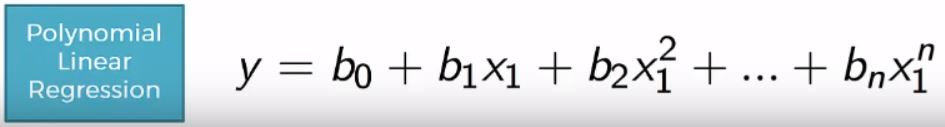

In [26]:
from sklearn.preprocessing import PolynomialFeatures

In [27]:
x_poly = PolynomialFeatures()

In [29]:
help(x_poly)

Help on PolynomialFeatures in module sklearn.preprocessing._data object:

class PolynomialFeatures(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  PolynomialFeatures(degree=2, *, interaction_only=False, include_bias=True, order='C')
 |  
 |  Generate polynomial and interaction features.
 |  
 |  Generate a new feature matrix consisting of all polynomial combinations
 |  of the features with degree less than or equal to the specified degree.
 |  For example, if an input sample is two dimensional and of the form
 |  [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].
 |  
 |  Parameters
 |  ----------
 |  degree : int, default=2
 |      The degree of the polynomial features.
 |  
 |  interaction_only : bool, default=False
 |      If true, only interaction features are produced: features that are
 |      products of at most ``degree`` *distinct* input features (so not
 |      ``x[1] ** 2``, ``x[0] * x[2] ** 3``, etc.).
 |  
 |  include_bias : bool, default

In [30]:
x_poly = PolynomialFeatures(degree = 2)
## degree = 2 --> 
#    (0,        1,       2)
## X2 ** 0,  X2 ** 1,  X2 ** 2

In [31]:
x_poly2 = x_poly.fit_transform(X2)
x_poly2

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [32]:
x1_poly = PolynomialFeatures(degree = 3)
## degree = 3 -->
## ( 0,         1,         2,       3)
## X2 ** 0,  X2 ** 1,  X2 ** 2, X2 ** 3

In [33]:
x2_poly2 = x1_poly.fit_transform(X2)
x2_poly2

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [34]:
X2

,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [39]:
10 ** 3

1000

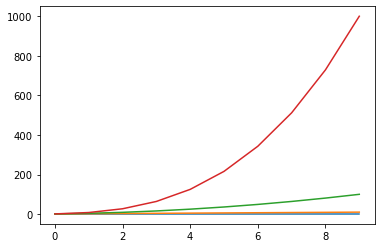

In [40]:
plt.plot(x2_poly2)

- Now apply linera regression to the newly generated values(x2_poly2)

In [41]:
lin_reg3 = LinearRegression()

In [42]:
lin_reg3.fit(x2_poly2, Y2)

LinearRegression()

In [43]:
Y_predict3 = lin_reg3.predict(x2_poly2)
Y_predict3

array([ 14902.09790211,  78759.90675991,  94960.37296037,  88223.77622377,
        83270.3962704 , 104820.51282051, 177594.40559441, 326312.35431236,
       575694.63869464, 950461.53846153])

In [44]:
r2_score(Y2, Y_predict3)

0.9812097727913367

### Split the dataset for testing and training